In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# reading the values in csv file
import pandas as pd
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#Checking nan values
df.isna()
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
#Renaming the columns
df=df.rename(columns={'Annual Income (k$)' : "Annual Income" ,'Spending Score (1-100)' : 'Spend' })
df.head()

,CustomerID,Gender,Age,Annual Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# to find the relationships between Income and spendngs we use scatterplot
import seaborn as sns
import matplotlib.pyplot as plt



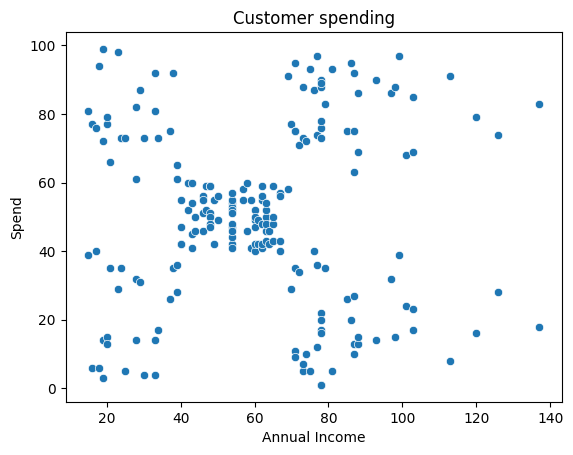

In [13]:
sns.scatterplot(x='Annual Income', y='Spend' ,data=df)
plt.title('Customer spending')
plt.show()

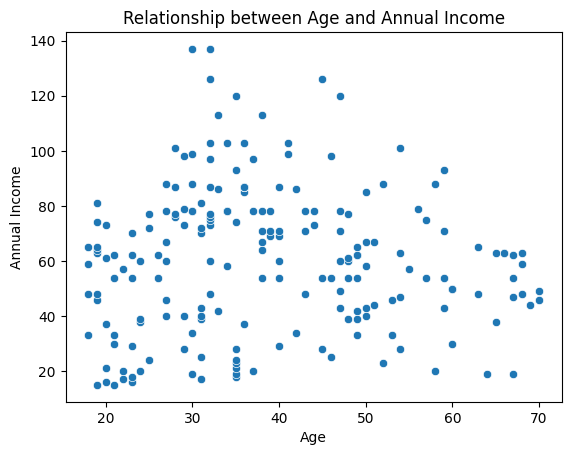

In [15]:
sns.scatterplot(x='Age',y='Annual Income',data=df)
plt.title('Relationship between Age and Annual Income')
plt.show()

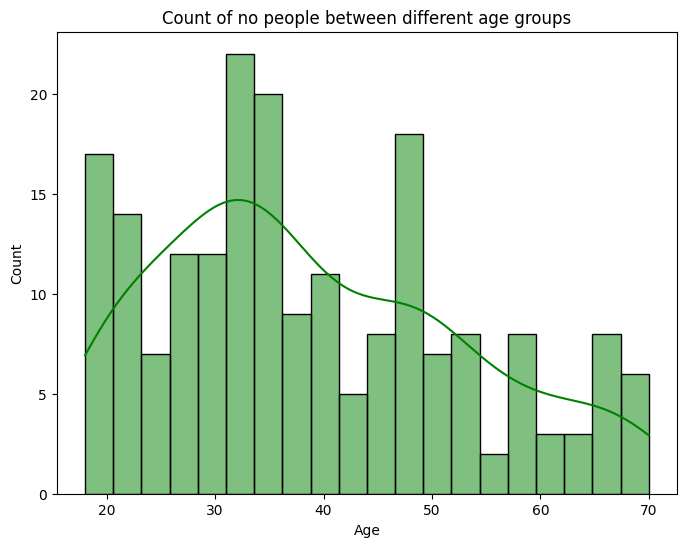

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(df["Age"],kde=True,bins=20,color='Green')
plt.title('Count of no people between different age groups')
plt.show()

In [26]:
x=df[['Annual Income','Spend']]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


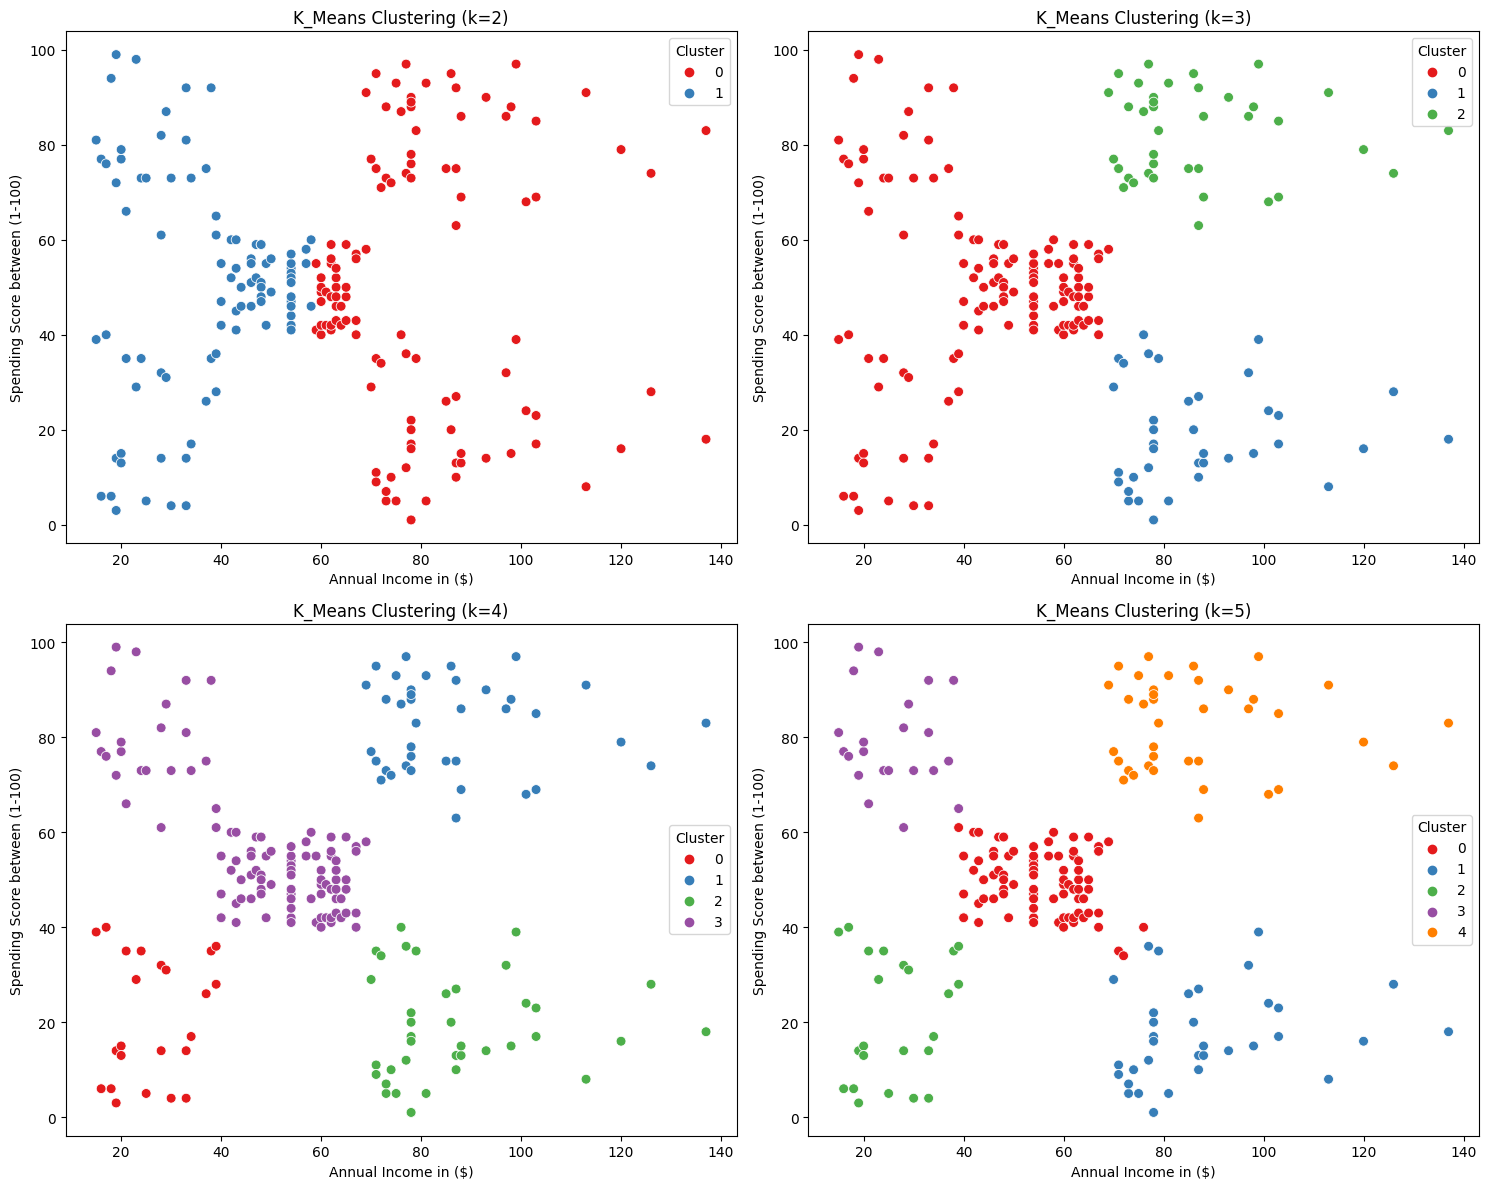

In [33]:
# Finally performing k means algorithm
from sklearn.cluster import KMeans
k_values=[2,3,4,5]
fig,axes=plt.subplots(2,2,figsize=(15,12))
axes=axes.flatten() 
for i ,k in enumerate(k_values):
    #Applying Kmeans clustering
    kmeans=KMeans(n_clusters=k, random_state=42)
    df['Cluster']=kmeans.fit_predict(x)
    sns.scatterplot(x='Annual Income',y='Spend',hue='Cluster',data=df,palette='Set1',s=50,ax=axes[i])
    axes[i].set_title(f'K_Means Clustering (k={k})')
    axes[i].set_xlabel('Annual Income in ($)')
    axes[i].set_ylabel('Spending Score between (1-100)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_42/3580112033.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=df['Cluster'], y=df['Annual Income'], data=df, palette='Set2',ax=ax)
/tmp/ipykernel_42/3580112033.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Cluster', y='Spend', data=df,palette='Set2', ax=ax)


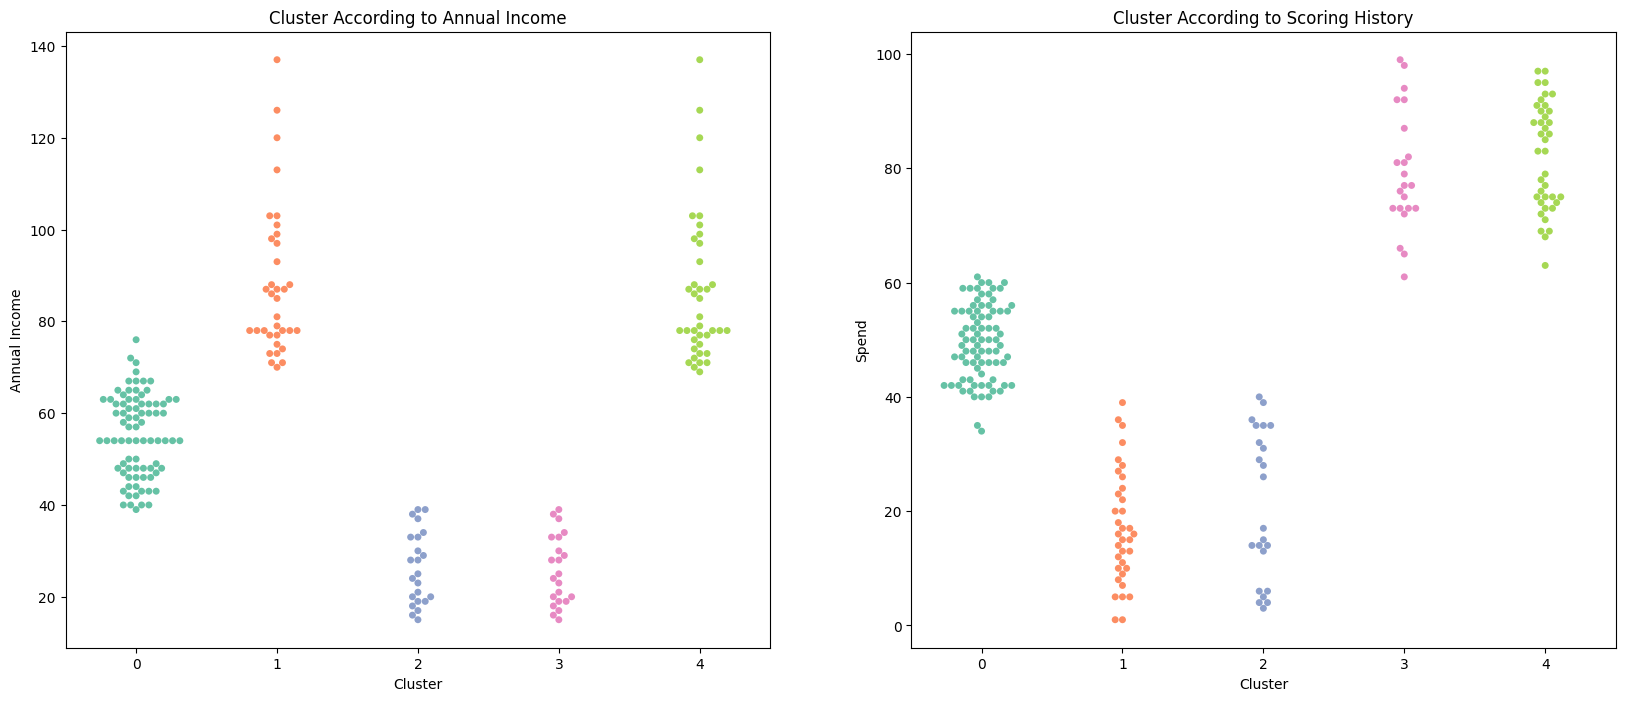

In [35]:
# AFter the cluster points converges our code looks like
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x=df['Cluster'], y=df['Annual Income'], data=df, palette='Set2',ax=ax)
ax.set_title('Cluster According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Cluster', y='Spend', data=df,palette='Set2', ax=ax)
ax.set_title('Cluster According to Scoring History')

plt.show()